<h1 id="sumario">Sumário</h1>
<ul>
    <li><a href="#analise_inicial_dados">Análise Inicial dos Dados</a></li>
    <li><a href="#analise_exploratoria_dados">Análise Exploratória dos Dados</a></li>
    <li><a href="#modelos_preditivos">Modelos Preditivos</a></li>
    <li><a href="#analise_resultados">Análise dos Resultados</a></li>
</ul>

<div id = "analise_inicial_dados">
<h1 id="analise_inicial_dados">Análise Inicial dos Dados</h1>
</div>

In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv("data.csv", sep=';')

Análise inicial dos dados.
Aqui buscamos entender como são os dados, quais são os tipos dos dados e se há necessidade de algum tratamento prévio aos dados para então seguir com uma análise mais profunda das categorias.

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.shape

(4424, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
numbers = df.describe().T
numbers['counts'] = df.select_dtypes(include=np.number).nunique().values

numbers.sort_values(by='counts',ascending=False)

,count,mean,std,min,25%,50%,75%,max,counts
Curricular units 1st sem (grade),4424.0,10.640822,4.843663,0.00,11.00,12.285714,13.400000,18.875000,805
Curricular units 2nd sem (grade),4424.0,10.230206,5.210808,0.00,10.75,12.200000,13.333333,18.571429,786
Admission grade,4424.0,126.978119,14.482001,95.00,117.90,126.100000,134.800000,190.000000,620
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000,101
Father's occupation,4424.0,11.032324,25.263040,0.00,4.00,7.000000,9.000000,195.000000,46
Age at enrollment,4424.0,23.265145,7.587816,17.00,19.00,20.000000,25.000000,70.000000,46
Curricular units 1st sem (evaluations),4424.0,8.299051,4.179106,0.00,6.00,8.000000,10.000000,45.000000,35
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000,34
Mother's occupation,4424.0,10.960895,26.418253,0.00,4.00,5.000000,9.000000,194.000000,32
Curricular units 2nd sem (evaluations),4424.0,8.063291,3.947951,0.00,6.00,8.000000,10.000000,33.000000,30


In [7]:
df.select_dtypes(exclude=np.number).describe()

,Target
count,4424
unique,3
top,Graduate
freq,2209


In [8]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [9]:
df.duplicated().sum()

0

Ao todo vemos que 4424 linhas de características dos dados, sendo 37 atributos. Desses atributos 4 são do tipo continuos e o restante dos numéricos são nomais. Analisando os targets, vemos que são dados desbalanceados, além de confirmar que é um problema do tipo multiclasse.

<div id = "analise_inicial_dados">
<h1 id="analise_inicial_dados">Análise Exploratória dos Dados</h1>
</div>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

## Dados Qualitativos

Aqui na análise dos dados qualitativos vamos buscar gerar um gráfico demonstrando a quantidade de classes que há em cada atributo. Fazer esse tipo de visualização gráfica vai nos ajudar a identificar quais atributos apresentam classes pouco representadas. Essas classes raras podem ser agregadas formando uma única classe mais representativa, pois essa ação trará benefícios como um melhor generalização dos modelos, melhoria na estabilidade dos modelos e simplificação no entendimento dos dados.
Autores como Chris Albon sugerem que 5% já deve ser considerado para um agrupamento, enquanto Geron Aurelien da bastante enfâse nessa junção, mas sem definir um valor fixo. Sendo assim irei assumir um meio termo de valores iguais ou abaixo de 3% como uma representação a ser incluida em uma única classe.

Abaixo você ira encontrar a função criada para a geração do gráfico, tornando possível avaliar o comportamento dos dados.

In [11]:
def qualitativos(entrada: list, data):
    # --------- Criação da imagem ----------------
    figura = plt.figure(figsize=(13,11))  # Cria uma figura com tamanho especificado
    tamanho = (2,2)  # Define a grade da figura (2x2)
    # plt.suptitle("Distribuição Dados Qualitativos", fontsize=30)  # Título opcional para a figura
    dt = data.copy()  # Cria uma cópia do DataFrame
    c = 0  # Inicializa o contador de colunas
    
    # =========== Posição 1
    for linha in range(2):  # Itera sobre as linhas da grade
        for col in range(2):  # Itera sobre as colunas da grade
            ax = plt.subplot2grid(
                tamanho,
                (linha, col)  # Define a posição do subplot na grade
            )
            if dt[entrada[c]].nunique() < 10:  # Verifica se a coluna tem menos de 10 categorias únicas
                fig = sns.countplot(data=dt, x=entrada[c], ax=ax)  # Plota um countplot vertical
                plt.title(entrada[c])  # Define o título do subplot com o nome da coluna
                plt.xlabel('')  # Remove o rótulo do eixo x
                ax.spines[['right', 'top']].set_visible(False)  # Remove as bordas superior e direita
                
                total = len(dt[entrada[c]])  # Calcula o total de instâncias na coluna
                for p in fig.patches:  # Itera sobre cada barra do gráfico
                    percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Calcula a porcentagem
                    x = p.get_x() + p.get_width() / 2 - 0.1  # Define a posição x para a anotação
                    y = p.get_height()  # Define a posição y para a anotação
                    fig.annotate(percentage, (x, y), ha='center', va='bottom')  # Adiciona a anotação de porcentagem
            else:
                fig = sns.countplot(data=dt, y=entrada[c], ax=ax, orient='h')  # Plota um countplot horizontal
                plt.title(entrada[c])  # Define o título do subplot com o nome da coluna
                plt.xlabel('')  # Remove o rótulo do eixo x
                ax.spines[['right', 'top']].set_visible(False)  # Remove as bordas superior e direita
                
                total = len(dt[entrada[c]])  # Calcula o total de instâncias na coluna
                for p in fig.patches:  # Itera sobre cada barra do gráfico
                    percentage = '{:.1f}%'.format(100 * p.get_width() / total)  # Calcula a porcentagem
                    x = p.get_width() * 1.05  # Define a posição x para a anotação, movendo um pouco à direita
                    y = p.get_y() + p.get_height() * 0.75  # Define a posição y para a anotação, movendo um pouco para baixo
                    if 100 * p.get_width() / total < 10:  # Verifica se a porcentagem é menor que 10%
                        x = dt[entrada[c]].value_counts().values[0] * 0.1  # Ajusta a posição x para pequenas porcentagens
                    fig.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8, verticalalignment='bottom')  # Adiciona a anotação de porcentagem
                    
            c += 1  # Incrementa o contador de colunas
            
    return plt.show()  # Mostra a figura gerada

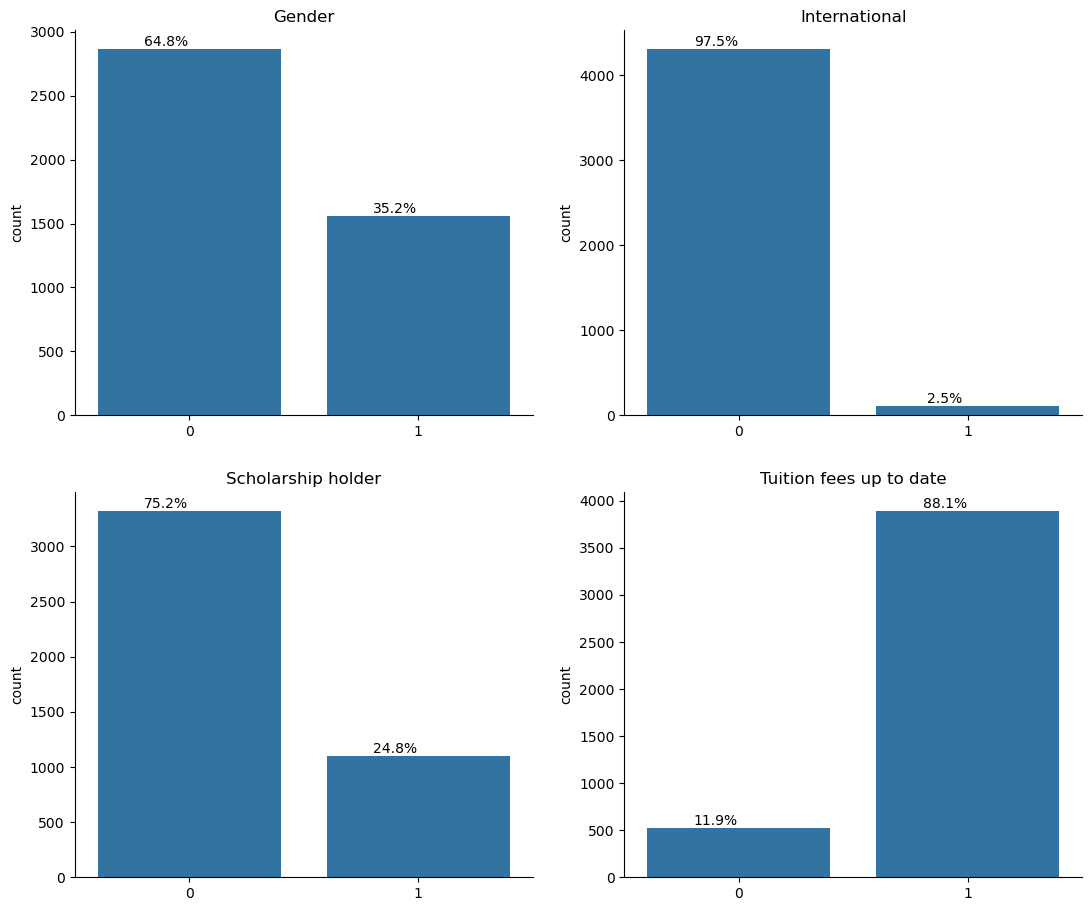

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


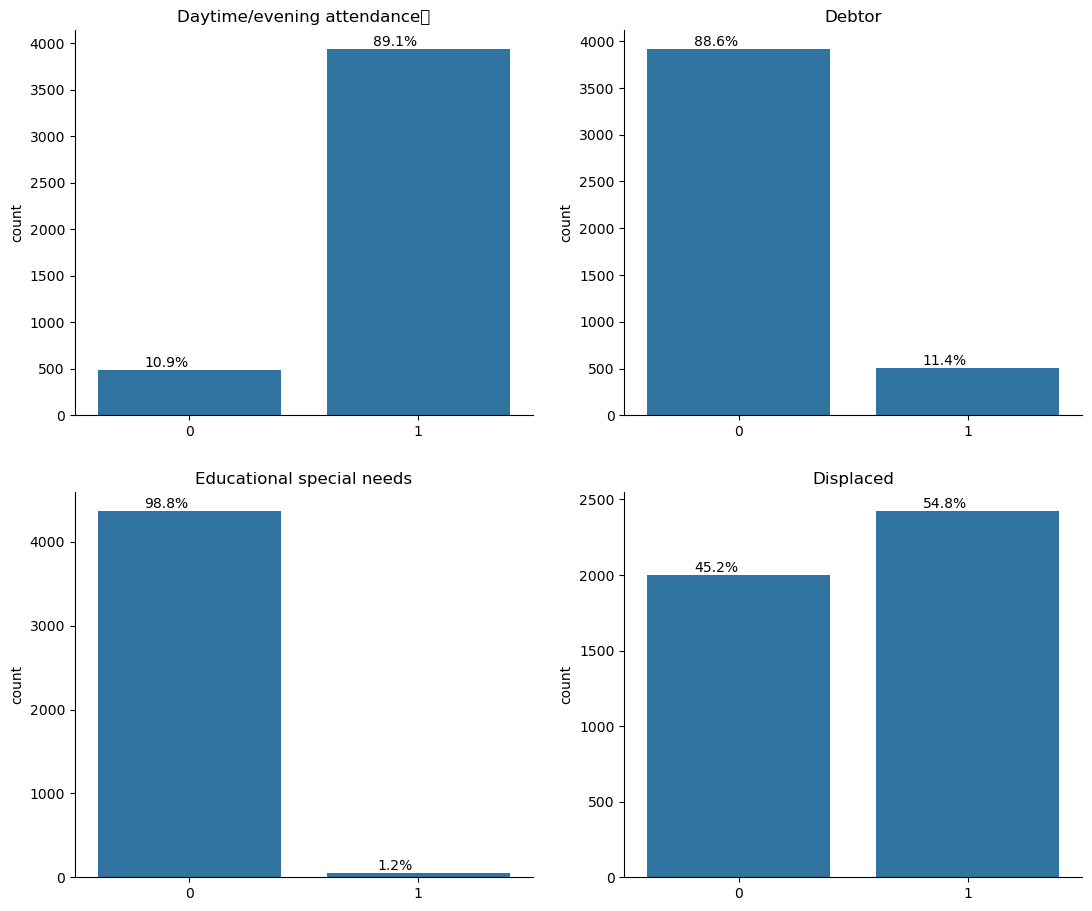

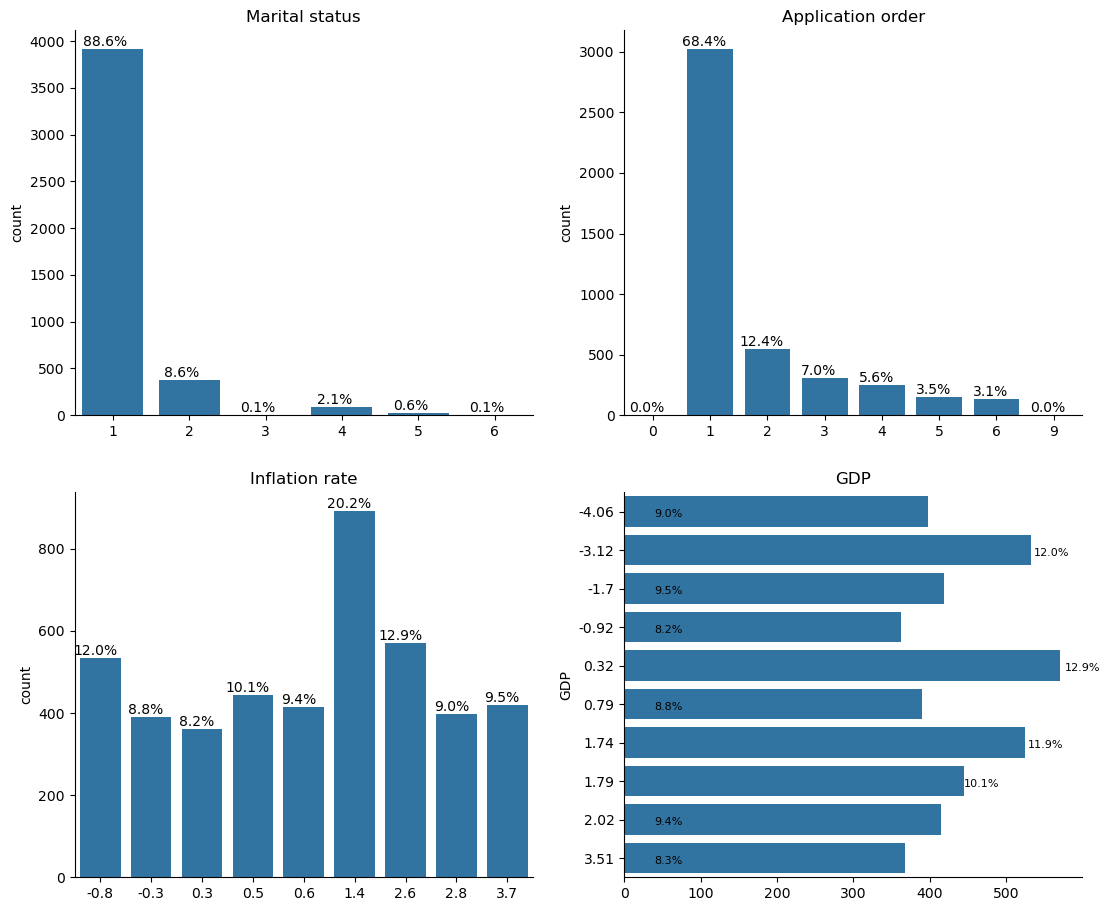

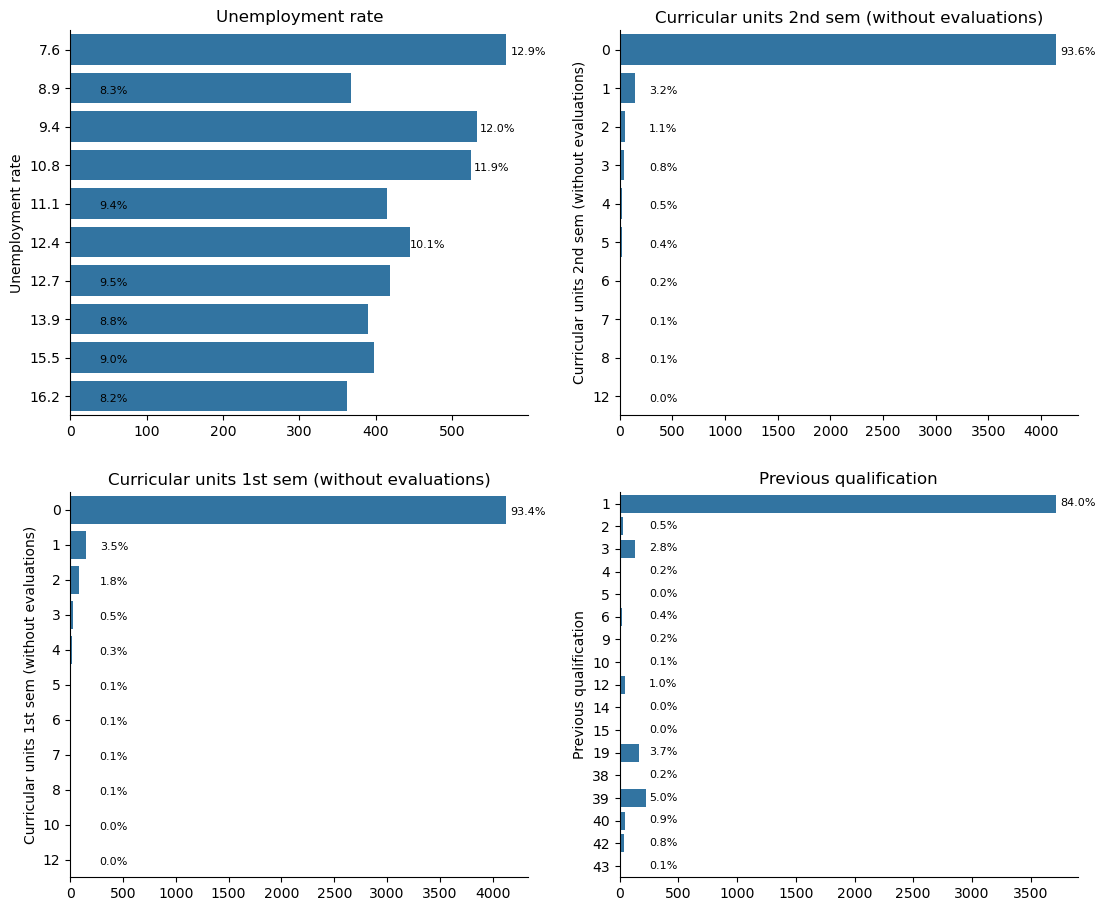

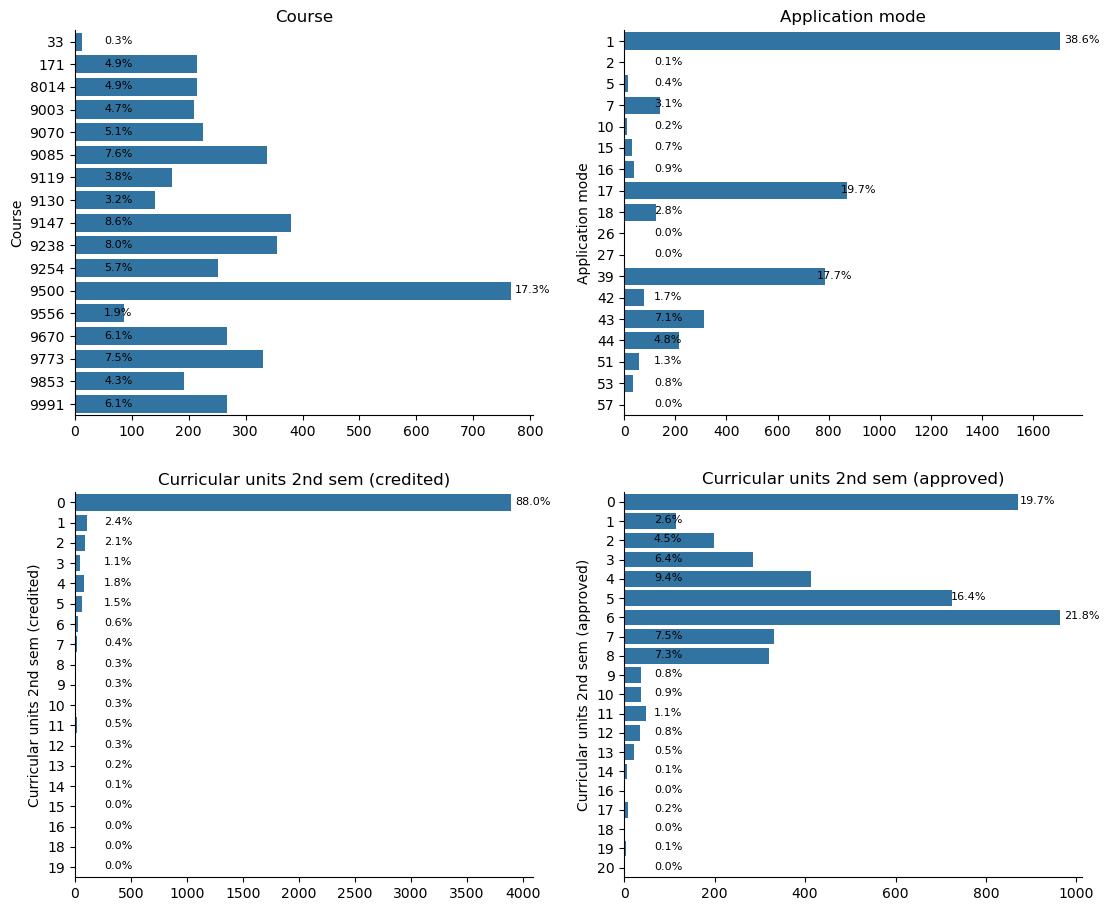

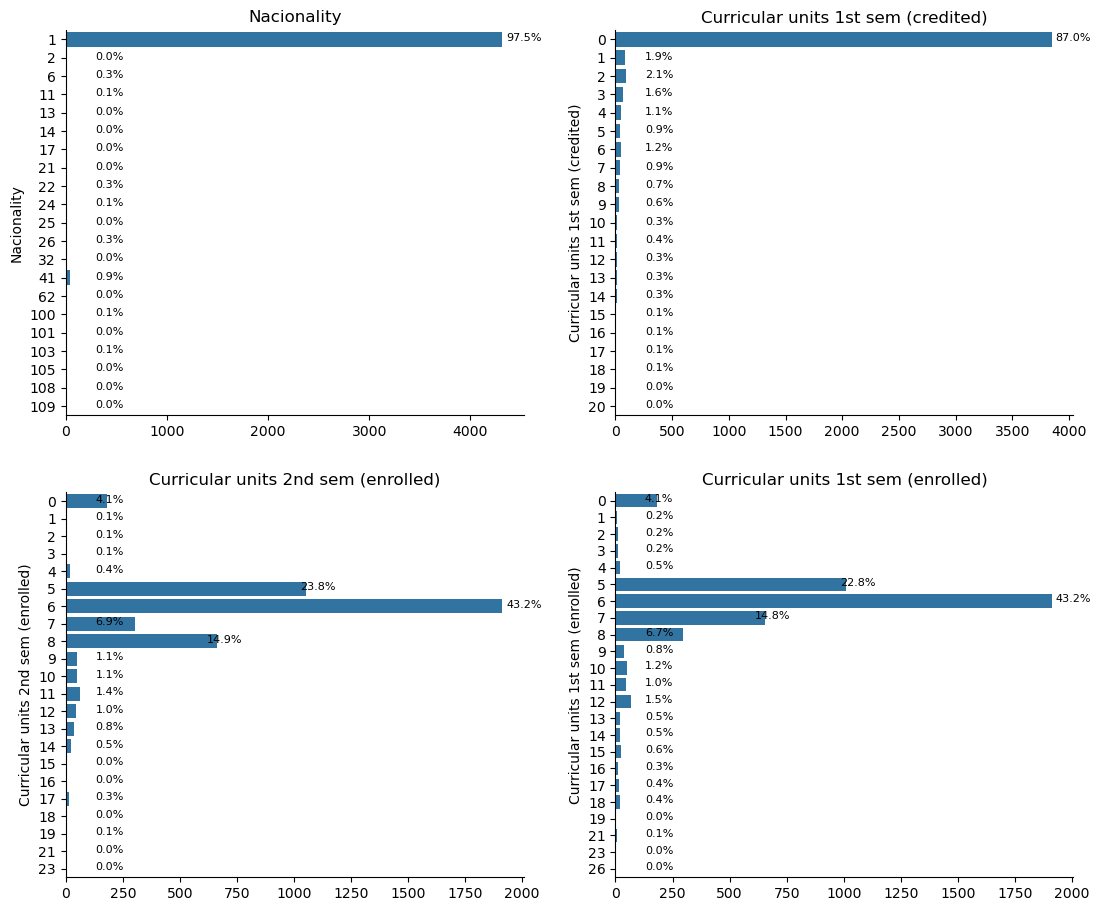

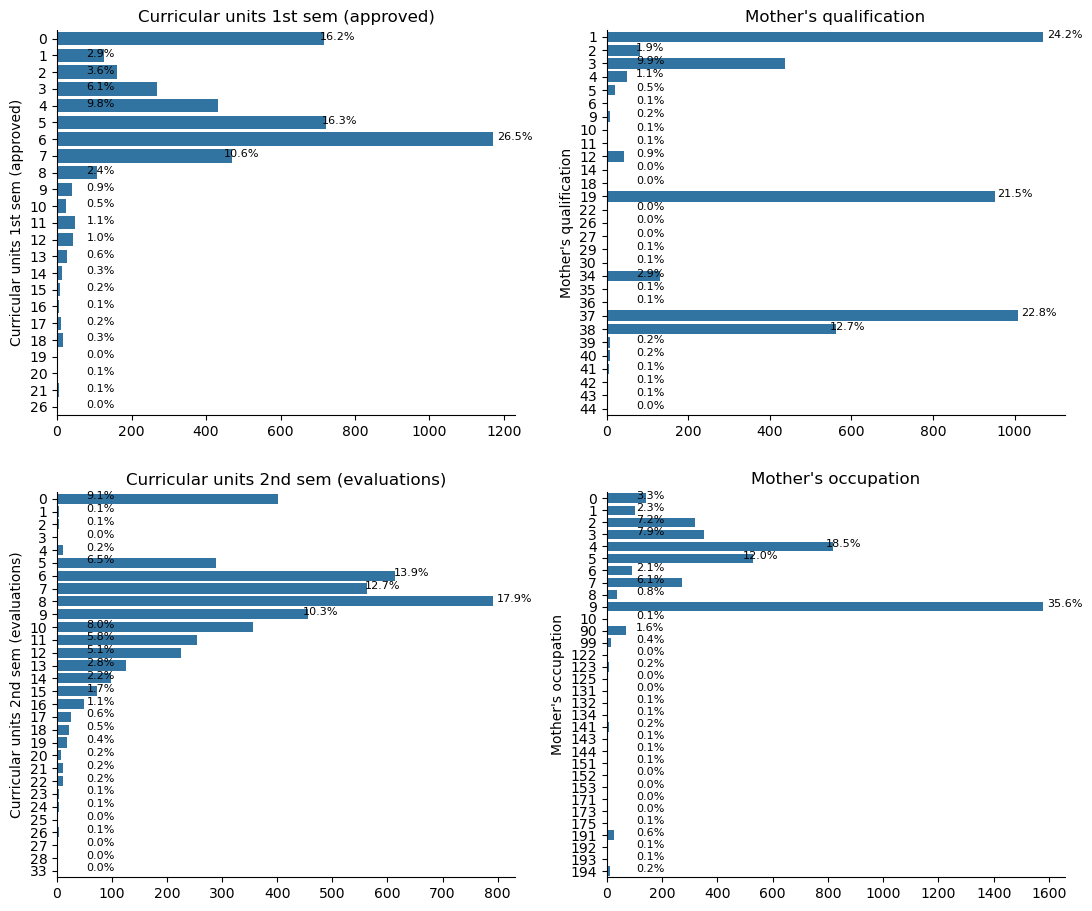

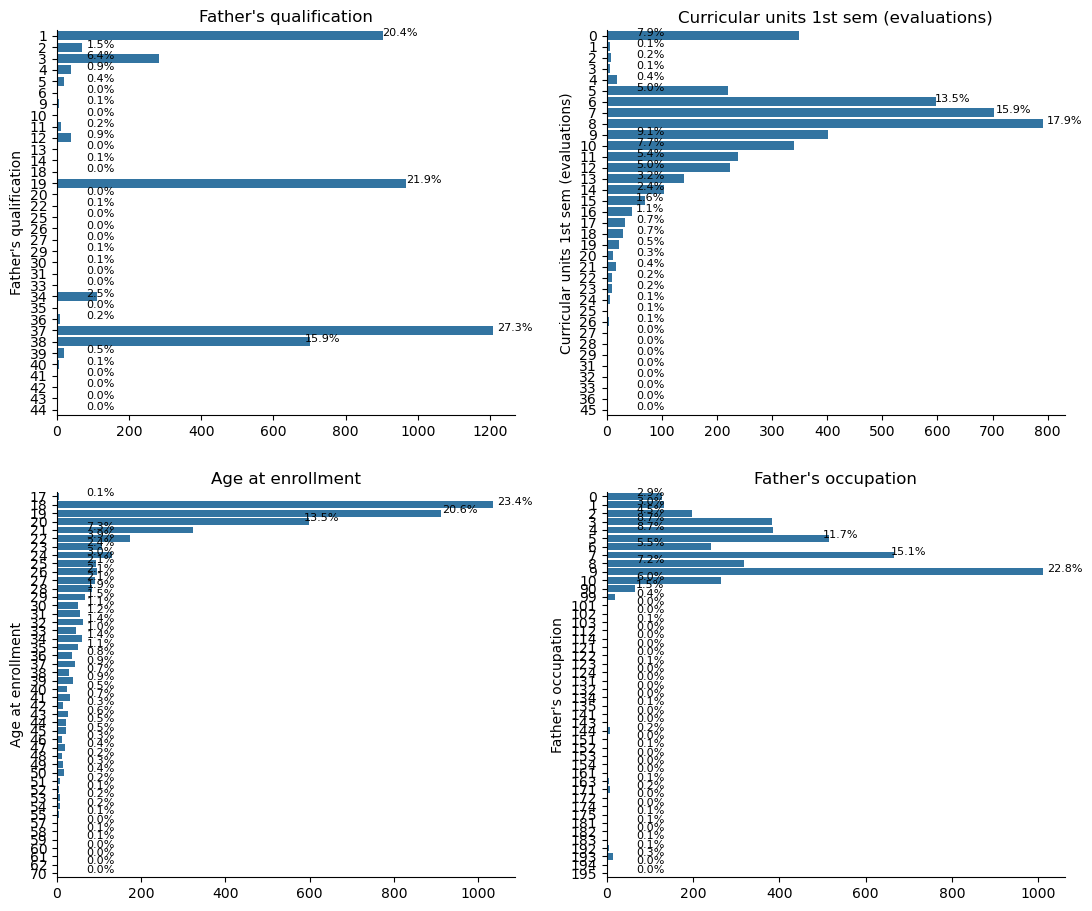

In [12]:
qualitativos_cols = df.select_dtypes(include=np.number).nunique()[df.select_dtypes(include=np.number).nunique()<100].sort_values().index.tolist()
c = 0
for i in range(round(len(qualitativos_cols)/4)):
    c+=4
    qualitativos(qualitativos_cols[c-4:c], df)
    

## Tratamento dos Dados Qualitativos

In [13]:
class TratamentoDadosQualitativos():
    
    def identification(self, col, data):
        porc = data[col].value_counts()/data.shape[0]
        return porc[porc.values <= 0.03].index.tolist() #Definindo um limiar de 3 %
        
    def data_treatment(self):
        dt = df.copy()
        dt.columns = dt.columns.str.replace(r"[()\/'\t]", "", regex=True).str.replace(" ", "_").str.lower()
    
        # ============ Tratamento de classes raras.
        for col in dt.select_dtypes(include=np.number):
            if dt[col].nunique() > 2 and dt[col].nunique() < 90:
                sub = self.identification(col,dt)
                new = dt[col].max() + 1
                dt.loc[dt[col].isin(sub),col] = new
            else:
                print(col)
                
        return dt

daytimeevening_attendance
previous_qualification_grade
admission_grade
displaced
educational_special_needs
debtor
tuition_fees_up_to_date
gender
scholarship_holder
international
curricular_units_1st_sem_grade
curricular_units_2nd_sem_grade


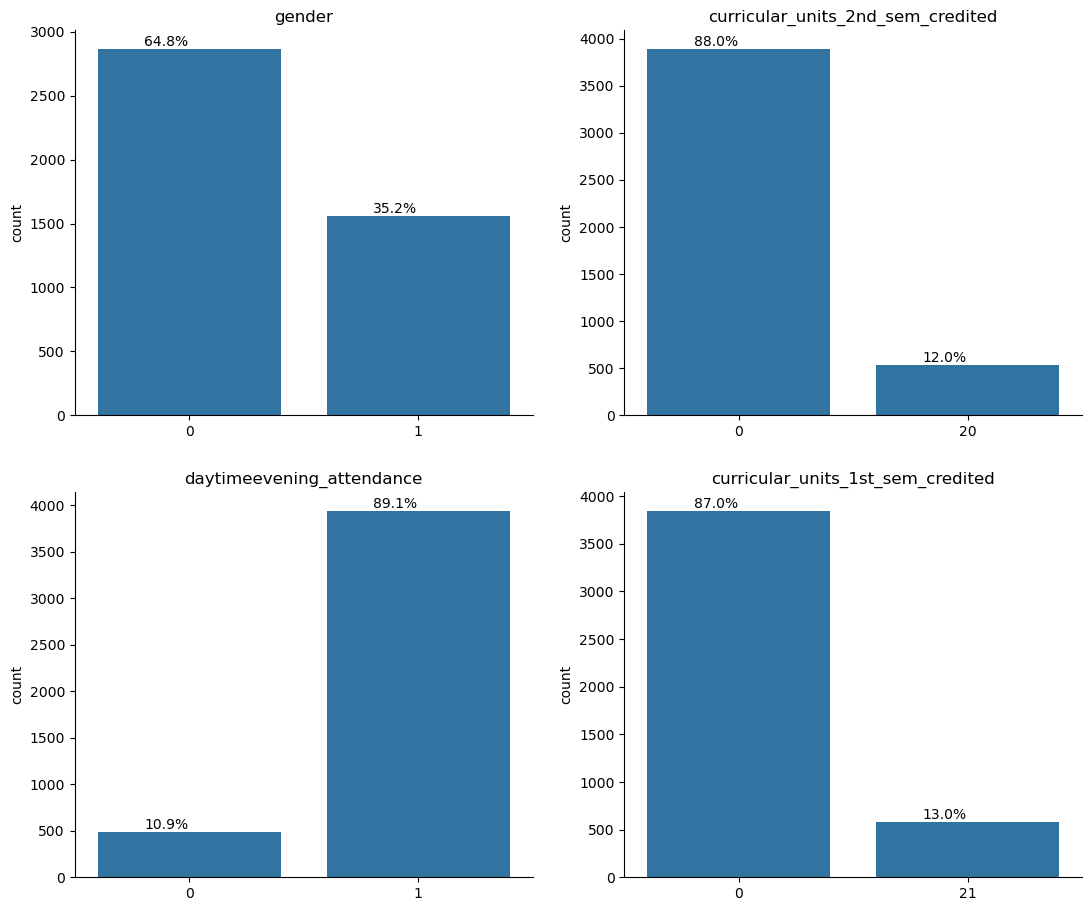

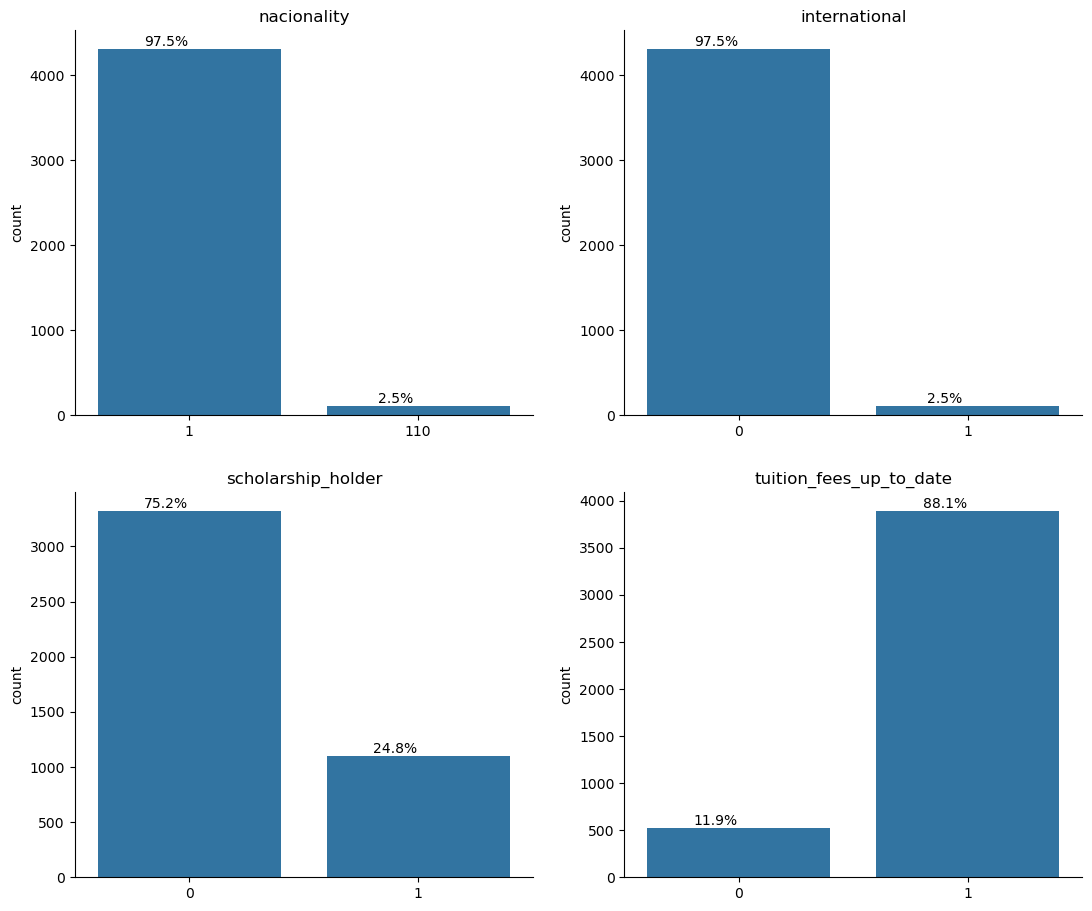

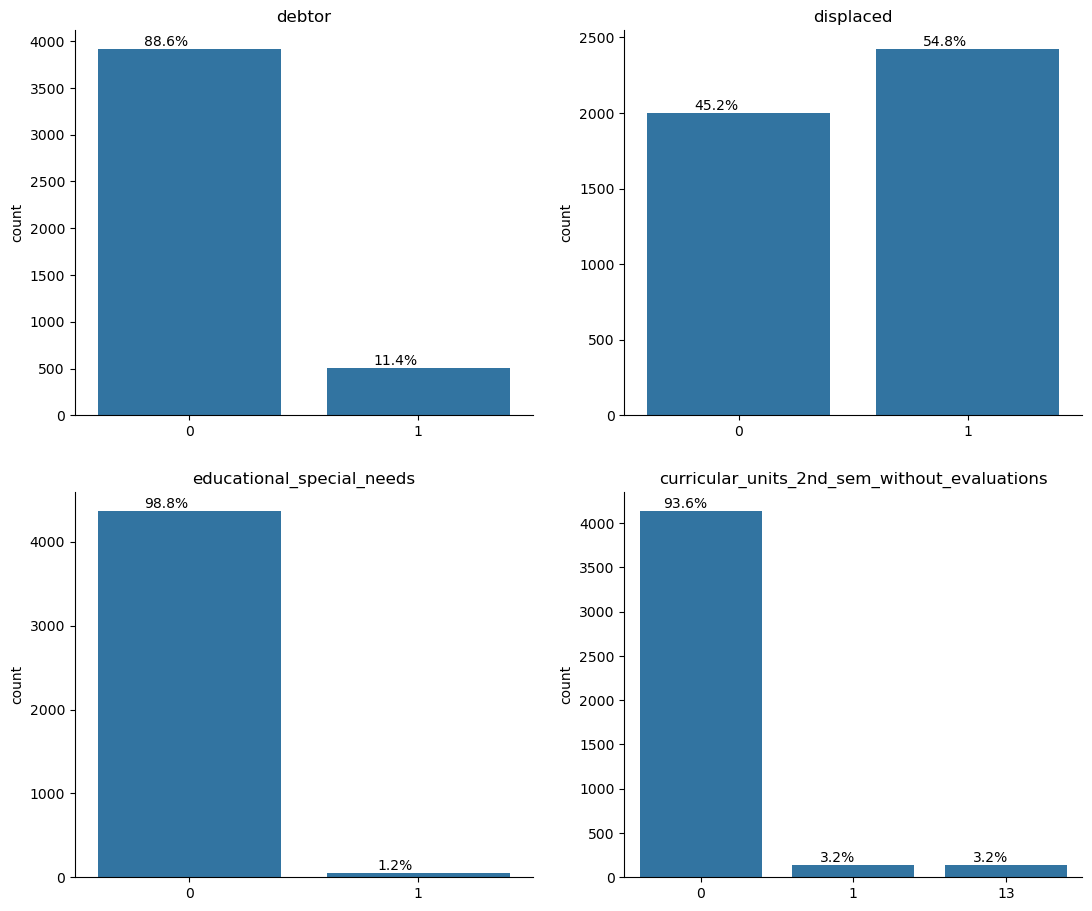

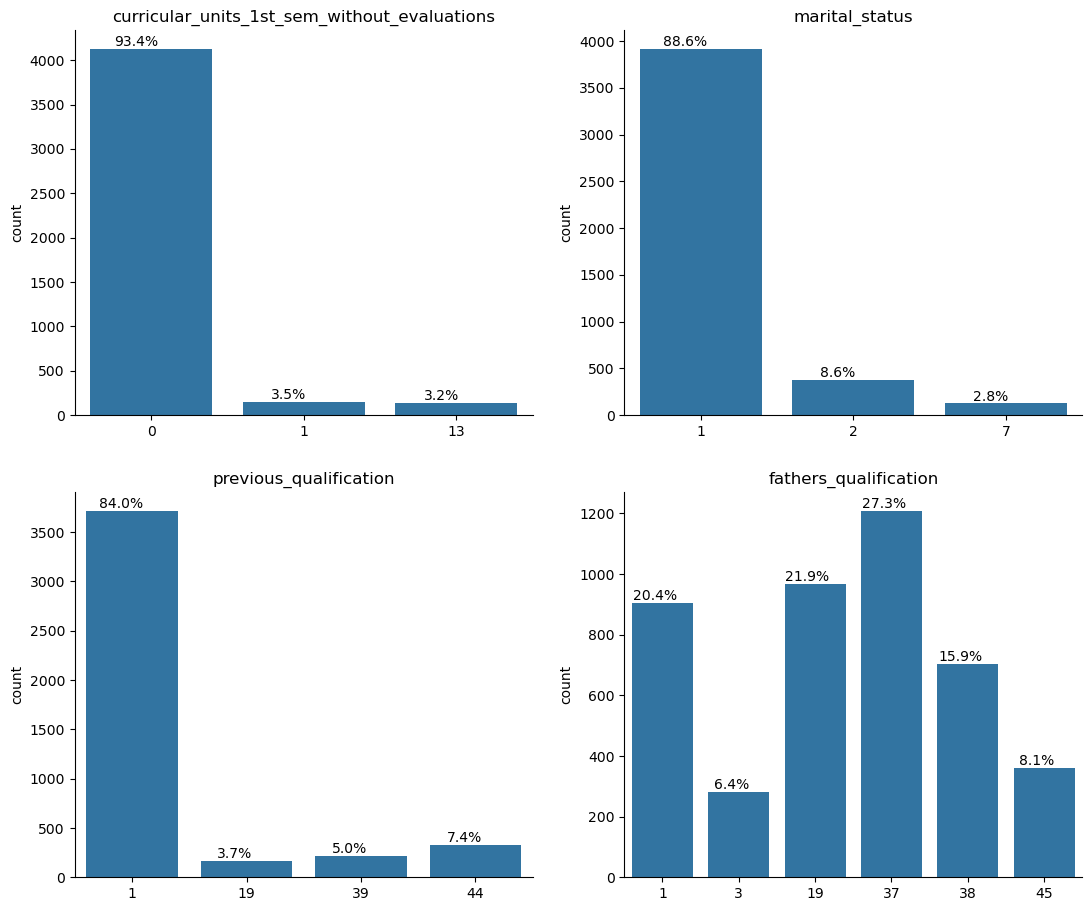

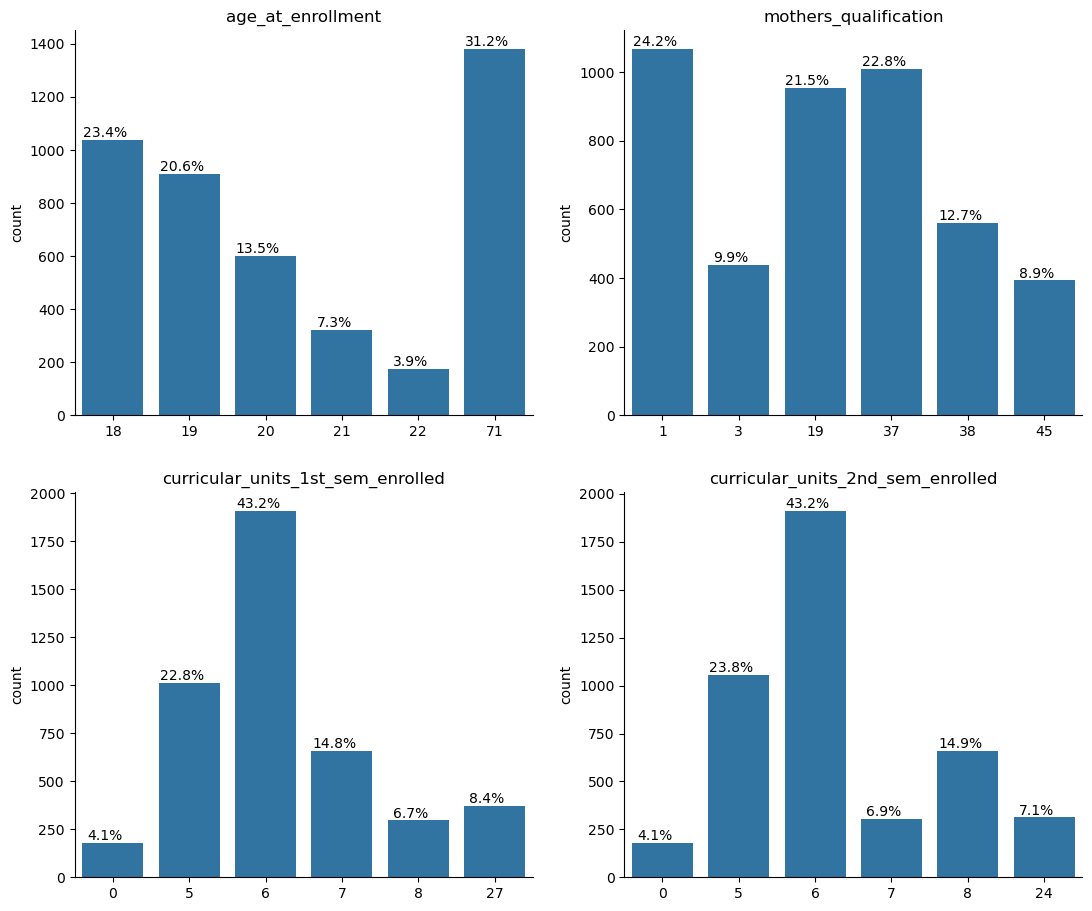

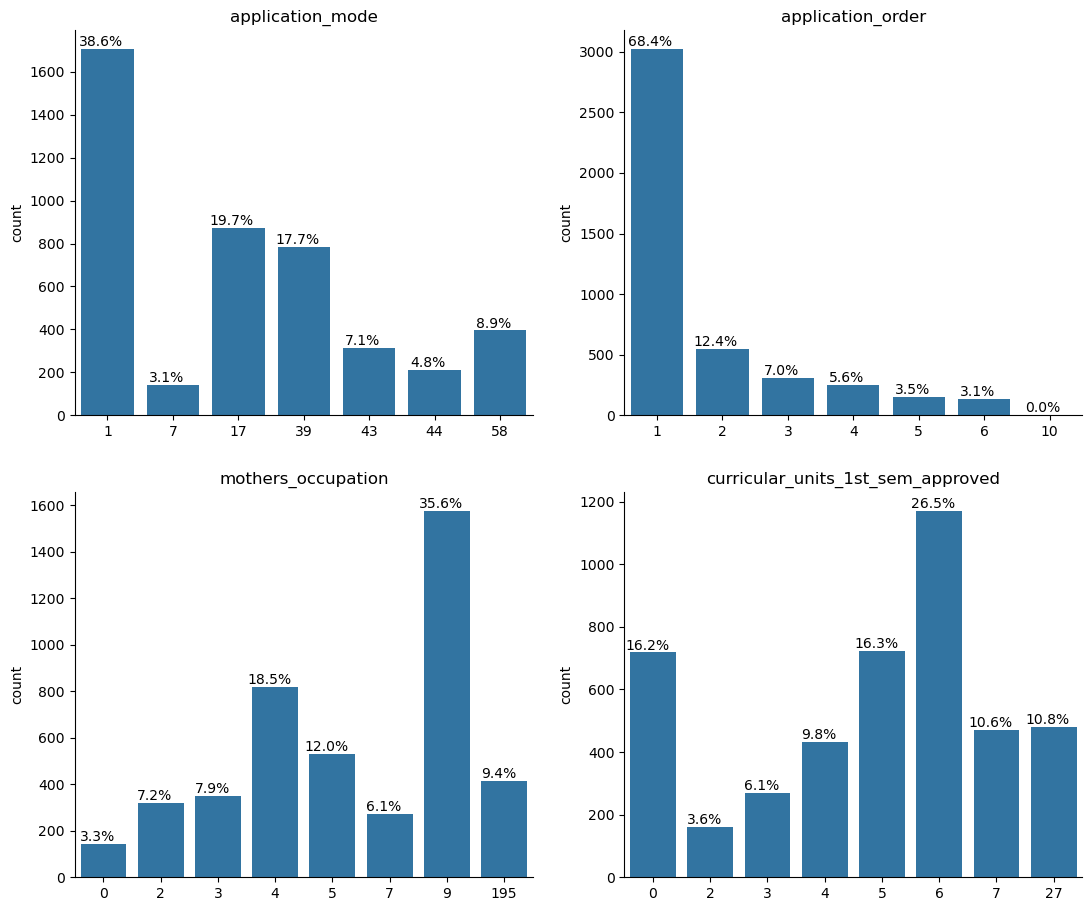

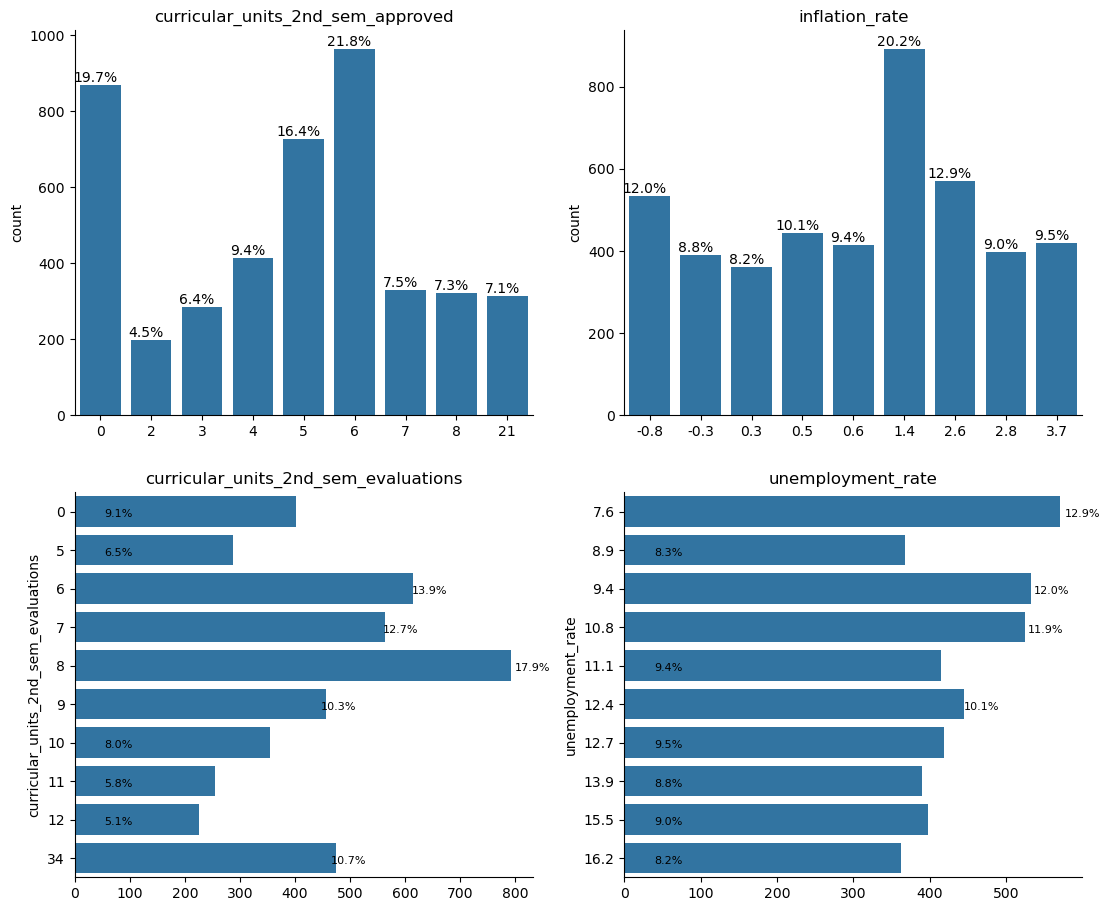

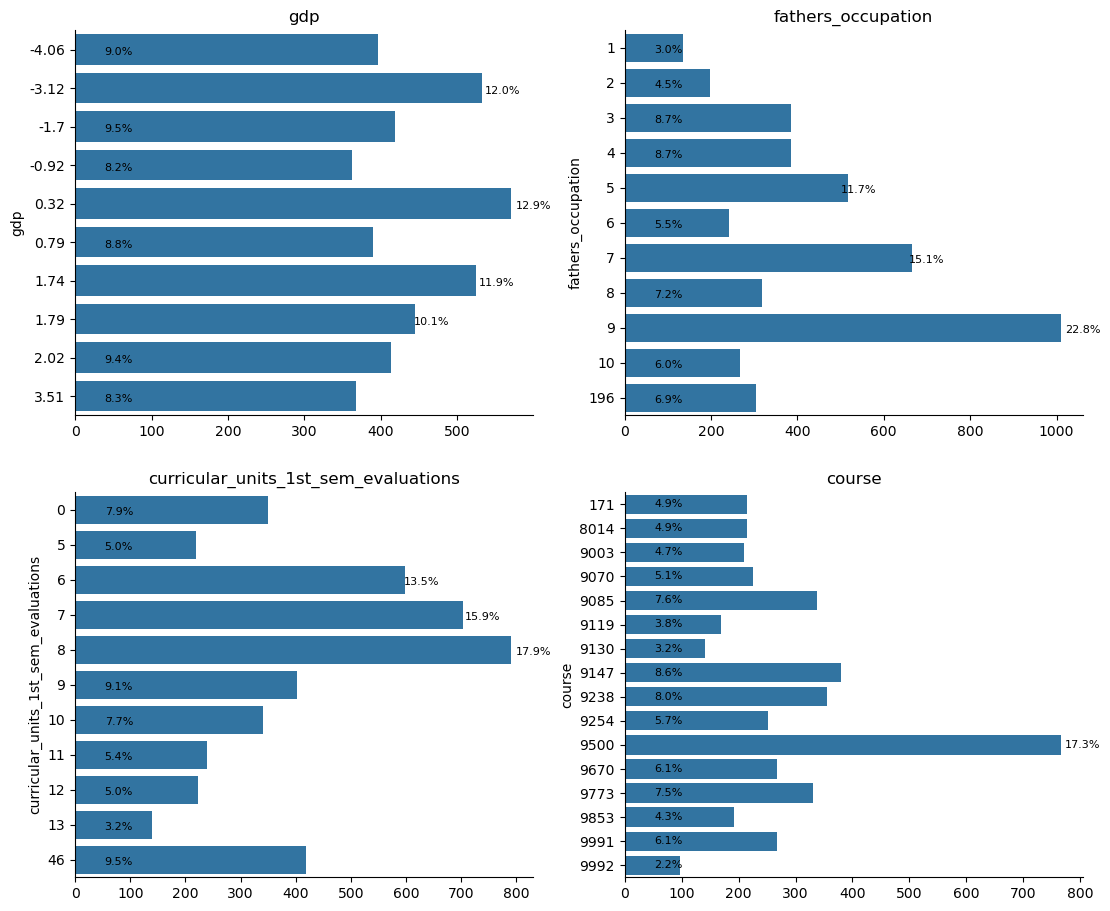

In [14]:
new_df = TratamentoDadosQualitativos().data_treatment()
qualitativos_cols = new_df.select_dtypes(include=np.number).nunique()[new_df.select_dtypes(include=np.number).nunique()<90].sort_values().index.tolist()
c = 0
for i in range(round(len(qualitativos_cols)/4)):
    c+=4
    qualitativos(qualitativos_cols[c-4:c], new_df)

Observa-se que definindo 3 % como um limiar para classe rara, obteve-se um resultado bem interessante com o agrupamento de diversas classes. Agora como visto anteriormente, o target apresente 3 classes, mas como o objetivo aqui é identificar possíveis alunos que irão desistir do curso, então será feito uma eliminação dos candidatos que estão em graduação atual. Esses dados podem até ser testados apos a finalização do modelo para classificar quais desses alunos podem desistir do curso. Essa alteração será feita ao final desses tratamentos iniciais dos dados.

## Dados Quantitativos

Aqui será analisado o tipo de distribuição dos dados quantitativos, avaliando se há outliers e o tipo de distribuição para averiguar a necessidade de aplicar um power transformation.

In [15]:
from scipy.stats import skew, kurtosis

In [16]:
class AnaliseQuantitativas:
    
    def distribution(self, dados, colunas):
        dt = dados.copy()
        figure = plt.figure(figsize=(12,10))
        tamanho = (2,2)
        c = 0
        for row in range(2):
            for col in range(2):
                pos = (row,col)
                ax = plt.subplot2grid(tamanho, pos)
                elemento = colunas[c]
                sns.histplot(data=dt, x = elemento, ax = ax , kde=True)
                
                skewness = skew(dt[elemento])
                kurt = kurtosis(dt[elemento])
                
                # Adicionar caixa de texto no gráfico
                textstr = f'Assimetria: {skewness:.2f}\nCurtose: {kurt:.2f}'
                props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
                ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                        verticalalignment='top', bbox=props)
                
                plt.title(elemento)  # Define o título do subplot com o nome da coluna
                plt.xlabel('')  # Remove o rótulo do eixo x
                ax.spines[['right', 'top']].set_visible(False)  # Remove as bordas superior e direita
                c += 1

        return plt.show()
    def outliers(self, dados, colunas):
        dt = dados.copy()
        figure = plt.figure(figsize=(12,10))
        tamanho = (2,2)
        c = 0
        for row in range(2):
            for col in range(2):
                pos = (row,col)
                ax = plt.subplot2grid(tamanho, pos)
                elemento = colunas[c]
                sns.boxplot(data=dt, x=elemento, ax=ax, width=0.3, flierprops=dict(marker='x', color='red', markersize=5))

                plt.title(elemento) 
                plt.xlabel('')  # Remove o rótulo do eixo x
                ax.spines[['right', 'top']].set_visible(False)  # Remove as bordas superior e direita
                c += 1

        return plt.show()

In [17]:
colunas = new_df.nunique()[new_df.nunique()>90].index

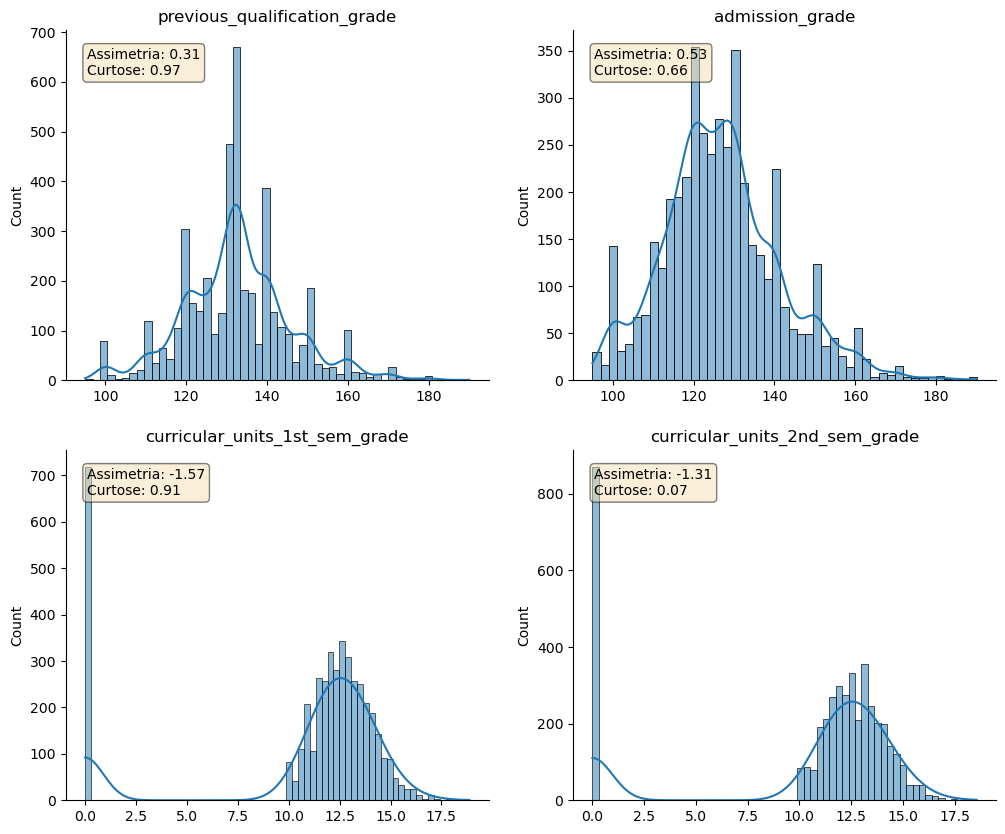

In [18]:
AnaliseQuantitativas().distribution(new_df, colunas)

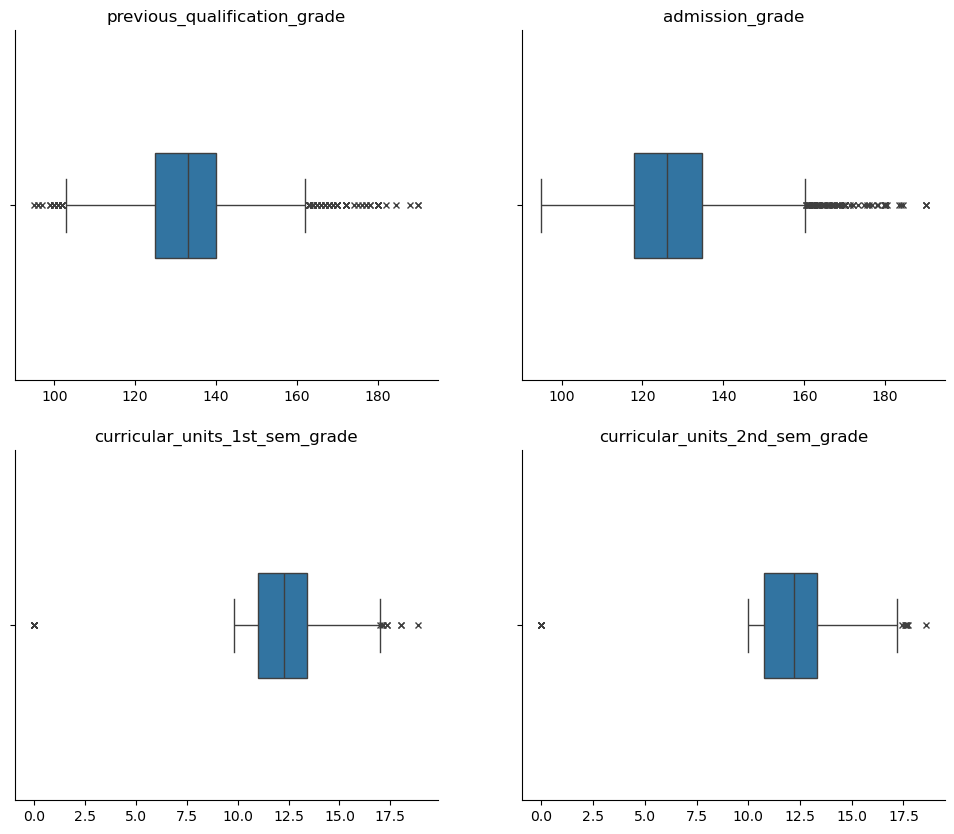

In [19]:
AnaliseQuantitativas().outliers(new_df, colunas)

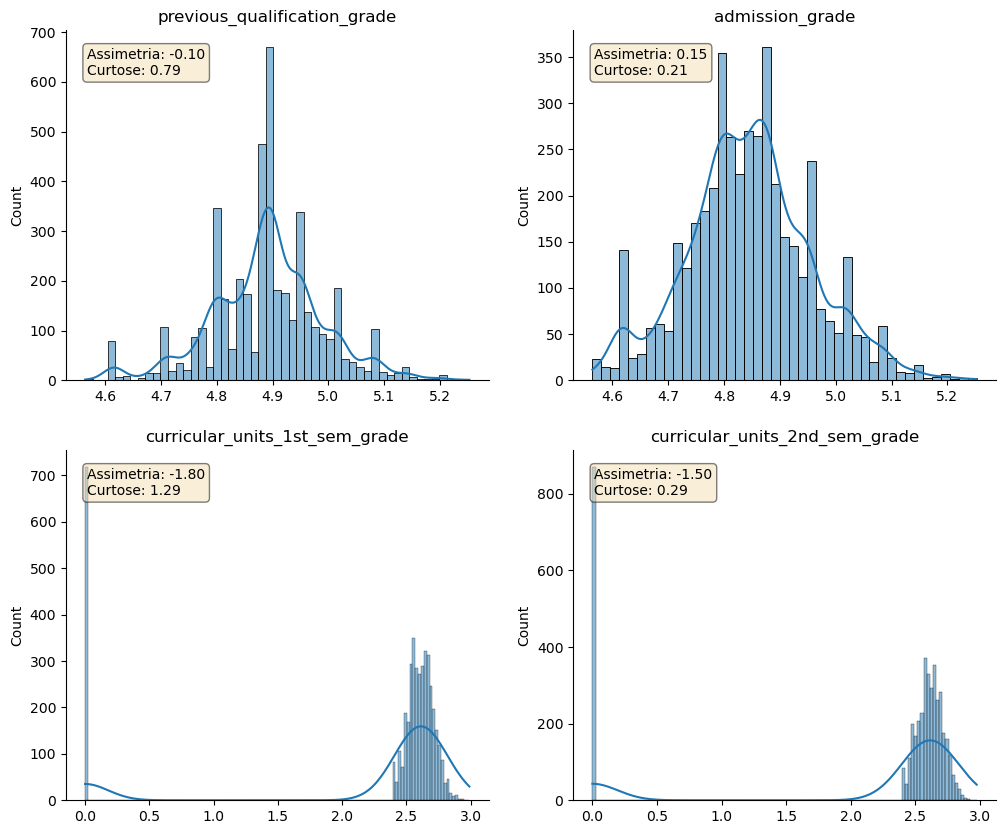

In [20]:
def data_treatment(data, colunas):
    dt = data.copy()
    for col in colunas:
        dt.loc[:, col] = np.log(dt[col] + 1)
    return dt

AnaliseQuantitativas().distribution(data_treatment(new_df, colunas), colunas)

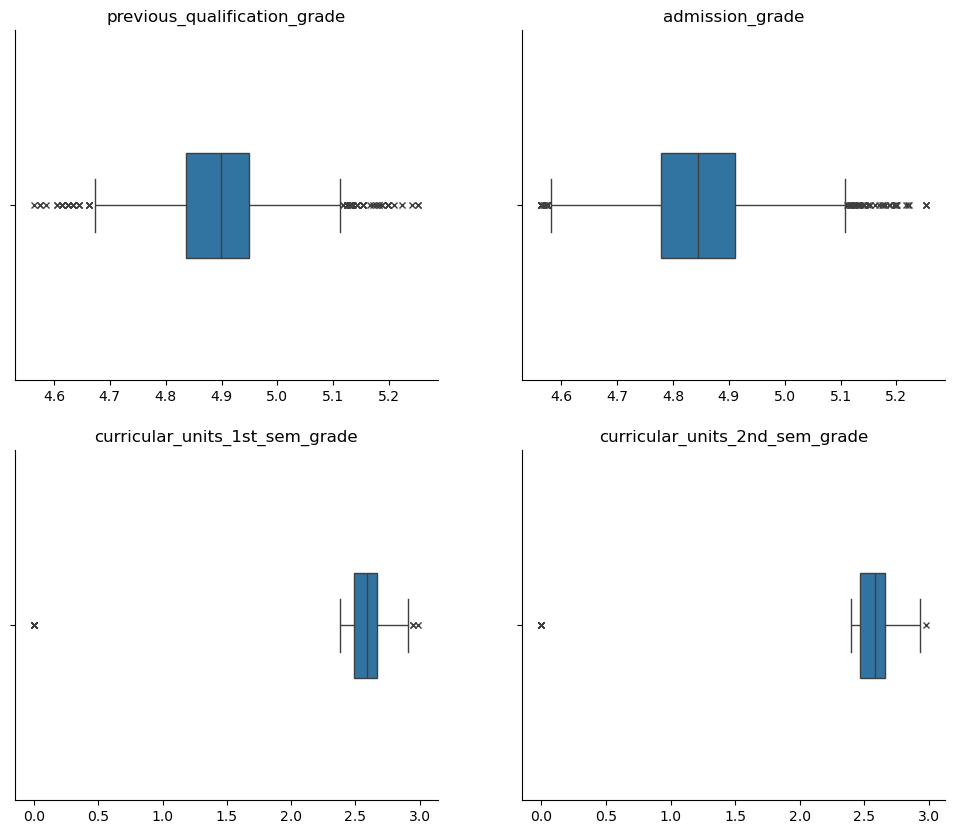

In [21]:
AnaliseQuantitativas().outliers(data_treatment(new_df, colunas), colunas)

In [22]:
new_df = data_treatment(new_df, colunas)

Ao aplicar o power transformation de log + 1, vamoes que não resolvemos os outliers por completo, em alguns casos que houve a resolução, o preço pago foi o aumento da assimetria e da curtose. Sobre manter ou não essa alteração, na hora do desenvolvimento do modelo de machine learning será posto em pratica ambas as escolhas.

## Tratamento do Target

Como temos estudantes ainda em graduação na nossa base de dados, eles serão removidos para a criação do modelo de machine learning, visto que o objetivo é classificar se o aluno irá ou não se graduar e para isso precisamos somente dos dados dos alunos graduados e dos desistentes. Com o modelo de machine learning pronto, esses dados serão usados para averiguar quais alunos podem acabar trancando o curso.

In [23]:
new_df['target'].value_counts()

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [24]:
enrolled_df = new_df.loc[new_df['target'] == 'Enrolled']
enrolled_df = enrolled_df.reset_index(drop=True)
new_df = new_df.loc[new_df['target'] != 'Enrolled']

In [25]:
new_df['target'].value_counts()/new_df.shape[0]

target
Graduate    0.60854
Dropout     0.39146
Name: count, dtype: float64

## Correlação dos Dados

Como a correlação dos dados pode consumir poder computacional desnecessário baseado na maldição da dimensionalidade, vale a pena estudar os dados em relação entre si.

In [26]:
from sklearn.preprocessing import LabelEncoder

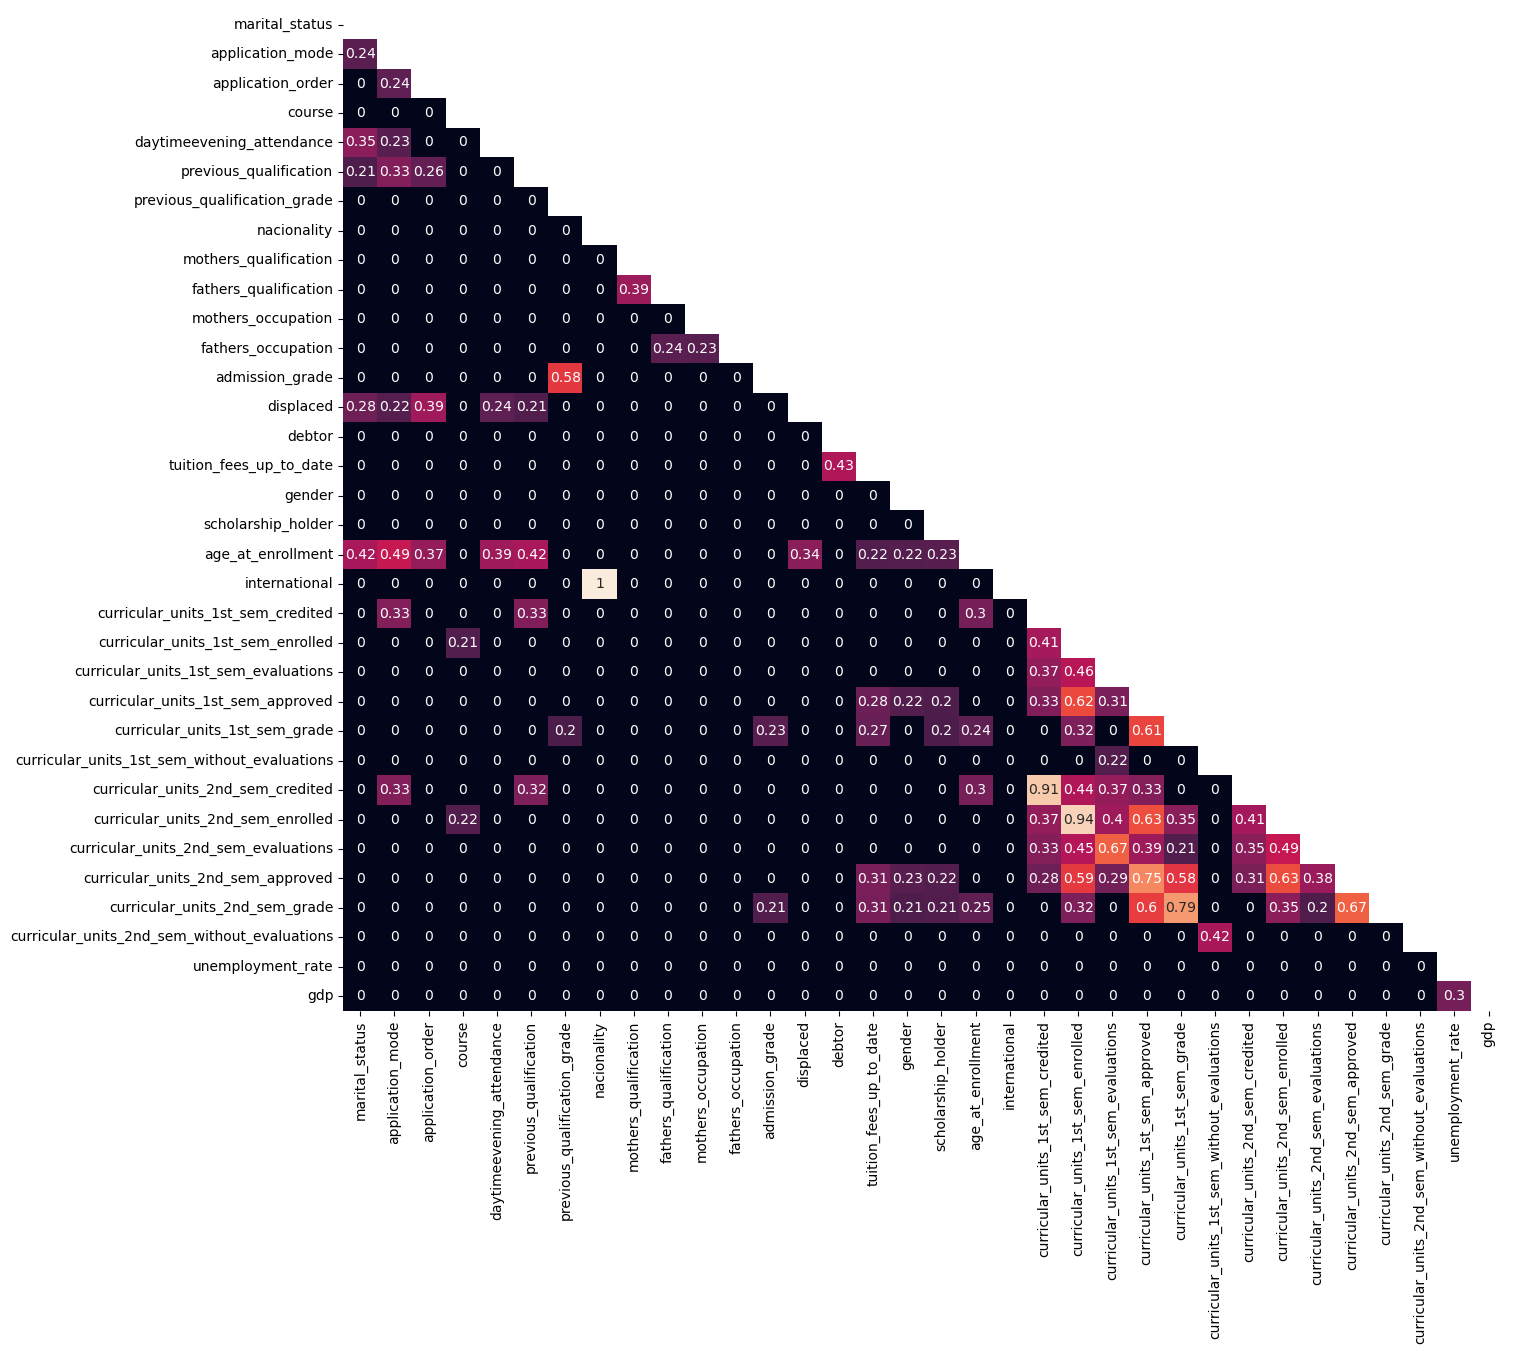

In [27]:
# Buscando encontrar relações não lineares nos dados, usaremos a correlação de spearman
def matrix_corr(entrada):
    plt.figure(figsize=(15,13))
    correl = abs(entrada.select_dtypes(include=np.number).corr(method='spearman'))
    threshold = 0.2
    correl[(correl <threshold) & (correl > -threshold)] = 0
    col = correl.sum(1)[correl.sum(1)>1].index
    correl = correl.loc[col,col]
    mask = np.triu(np.ones_like(correl, dtype=bool))
    sns.heatmap(correl[col], mask=mask, cbar=False, annot=True)
        
matrix_corr(new_df)


Percebe-se que a única informação que temos com a correlação igual a 1 é a de nacionalidade e se o estudante é internacional. Ou seja, essa coluna de nacionalidade pode ser excluida. 

<div id = "modelos_preditivos">
<h1 id="modelos_preditivos">Modelos Preditivos</h1>
</div>

Baseado do teorema que não a almomço grátis, não temos como ter certeza que um modelo A vai ser melhor que um modelo B, sendo assim iremos testar os principais modelos de classificação binária para definir qual modelo pode ser interessante buscar evoluir no tunning.
Métricas de Avaliação

* Como métrica de comparação será utilizado o ROC_AUC, que média a área no gráfico da curva em relação ao TPR e FNR.
* Como métrica de avaliação dos modelos será utilizado o Recall, visto que o objetivo é evitar que o máximo de alunos saiam, então favorecer alunos que já iriam terminar o curso pode não ser prejudicial.

In [28]:
!pip install scikit-optimize


Defaulting to user installation because normal site-packages is not writeable


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier
import time
from sklearn.model_selection import cross_val_score, cross_val_predict, learning_curve, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, confusion_matrix, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline


In [30]:
class ModelosBinarios:
    def __init__(self):
        self.model = None
        self.training_time = None

    def logistic_regression(self, X_train, y_train):
        start_time = time.time()
        self.model = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(max_iter=1000, C=1.0))
        ])
        self.model.fit(X_train, y_train)
        self.training_time = time.time() - start_time
        return self.model

    def sgd_classifier(self, X_train, y_train):
        start_time = time.time()
        self.model = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', SGDClassifier(max_iter=1000, tol=1e-3))
        ])
        self.model.fit(X_train, y_train)
        self.training_time = time.time() - start_time
        return self.model

    def random_forest(self, X_train, y_train):
        start_time = time.time()
        self.model = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42))
        ])
        self.model.fit(X_train, y_train)
        self.training_time = time.time() - start_time
        return self.model

    def gradient_boosting(self, X_train, y_train):
        start_time = time.time()
        self.model = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
        ])
        self.model.fit(X_train, y_train)
        self.training_time = time.time() - start_time
        return self.model

    def adaboost(self, X_train, y_train):
        start_time = time.time()
        self.model = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42))
        ])
        self.model.fit(X_train, y_train)
        self.training_time = time.time() - start_time
        return self.model

    def extra_trees(self, X_train, y_train):
        start_time = time.time()
        self.model = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42))
        ])
        self.model.fit(X_train, y_train)
        self.training_time = time.time() - start_time
        return self.model

    def naive_bayes(self, X_train, y_train):
        start_time = time.time()
        self.model = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', GaussianNB())
        ])
        self.model.fit(X_train, y_train)
        self.training_time = time.time() - start_time
        return self.model

    def svc(self, X_train, y_train):
        start_time = time.time()
        self.model = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', SVC(C=1.0, kernel='rbf', gamma='scale', probability=True))
        ])
        self.model.fit(X_train, y_train)
        self.training_time = time.time() - start_time
        return self.model

    def knn(self, X_train, y_train):
        start_time = time.time()
        self.model = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', KNeighborsClassifier(n_neighbors=5, algorithm='auto', weights="distance"))
        ])
        self.model.fit(X_train, y_train)
        self.training_time = time.time() - start_time
        return self.model

    def predict(self, X_test):
        if self.model is not None:
            return self.model.predict(X_test)
        else:
            raise ValueError("No model has been trained yet.")

    def predict_proba(self, X_test):
        if self.model is not None:
            if hasattr(self.model.named_steps['classifier'], "predict_proba"):
                return self.model.predict_proba(X_test)[:, 1]
            else:
                return self.model.decision_function(X_test)
        else:
            raise ValueError("No model has been trained yet.")

    def get_training_time(self):
        if self.training_time is not None:
            return self.training_time
        else:
            raise ValueError("No training time recorded. Train a model first.")

    def evaluate_models(self, X_train, y_train, X_test, y_test):
        models = {
            'Logistic Regression': self.logistic_regression,
            'SGD Classifier': self.sgd_classifier,
            'Random Forest': self.random_forest,
            'Gradient Boosting': self.gradient_boosting,
            'AdaBoost': self.adaboost,
            'Extra Trees': self.extra_trees,
            'Naive Bayes': self.naive_bayes,
            'SVC': self.svc,
            'KNN': self.knn
        }

        results = {}
        for name, model_func in models.items():
            model = model_func(X_train, y_train)
            y_pred = model.predict(X_test)
            y_proba = self.predict_proba(X_test)
            roc_auc = roc_auc_score(y_test, y_proba)
            report = classification_report(y_test, y_pred, output_dict=True)
            recall_0 = report['0']['recall']
            recall_1 = report['1']['recall']
            training_time = self.get_training_time()

            results[name] = {
                'roc_auc': roc_auc,
                'recall_0': recall_0,
                'recall_1': recall_1,
                'training_time': training_time
            }

        # Plot ROC AUC curves
        plt.figure(figsize=(10, 8))
        for name, model_func in models.items():
            model = model_func(X_train, y_train)
            y_proba = self.predict_proba(X_test)
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            plt.plot(fpr, tpr, label=f'{name} (area = {results[name]["roc_auc"]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curves')
        plt.legend(loc="lower right")
        plt.show()

        # Plot recall scores
        plt.figure(figsize=(10, 8))
        names = list(results.keys())
        recalls_0 = [results[name]['recall_0'] for name in names]
        recalls_1 = [results[name]['recall_1'] for name in names]
        bar_width = 0.35
        index = np.arange(len(names))

        plt.barh(index, recalls_0, bar_width, label='Class 0', color='skyblue')
        plt.barh(index + bar_width, recalls_1, bar_width, label='Class 1', color='lightgreen')

        plt.xlabel('Recall')
        plt.title('Recall Scores of Models')
        plt.yticks(index + bar_width / 2, names)
        plt.legend(loc='best')
        for i, v in enumerate(recalls_0):
            plt.text(v, i, f'{v:.2f}', va='center')
        for i, v in enumerate(recalls_1):
            plt.text(v, i + bar_width, f'{v:.2f}', va='center')
        plt.show()

        # Plot training times
        plt.figure(figsize=(10, 8))
        training_times = [results[name]['training_time'] / 60 for name in names]
        plt.barh(names, training_times, color='lightcoral')
        plt.xlabel('Training Time (minutes)')
        plt.title('Training Times of Models')
        for index, value in enumerate(training_times):
            plt.text(value, index, f'{value:.2f}')
        plt.show()

In [31]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

class CrossValidationExtraTrees:
    def __init__(self, n_estimators=100, random_state=42):
        """
        Inicializa a classe com o modelo ExtraTreesClassifier.
        - n_estimators: Número de árvores na floresta.
        - random_state: Controla a aleatoriedade do estimador.
        """
        self.model = ExtraTreesClassifier(n_estimators=n_estimators, random_state=random_state)
    
    def plot_learning_curve(self, X, y, cv=5):
        """
        Plota a curva de aprendizado (learning curve).
        - X: Dados de entrada.
        - y: Rótulos de saída.
        - cv: Número de folds na validação cruzada.
        """
        train_sizes, train_scores, test_scores = learning_curve(self.model, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure()
        plt.title('Learning Curve')
        plt.xlabel('Training examples')
        plt.ylabel('Score')
        plt.ylim(0.7, 1.01)
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()

    def evaluate_model(self, X, y, cv=5):
        """
        Avalia o modelo usando validação cruzada.
        - X: Dados de entrada.
        - y: Rótulos de saída.
        - cv: Número de folds na validação cruzada.
        Plota a matriz de confusão e uma tabela com as métricas de avaliação.
        """
        y_pred = cross_val_predict(self.model, X, y, cv=cv, n_jobs=-1)
        conf_matrix = confusion_matrix(y, y_pred)
        
        # Plot confusion matrix using sns.heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        
        # Classification report
        report = classification_report(y, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        
        # Plot classification report as table
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.axis('tight')
        ax.axis('off')
        table = ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.2)
        plt.title('Classification Report')
        plt.show()

        print(f"Recall: {report['macro avg']['recall']:.2f}")
        print(f"Precision: {report['macro avg']['precision']:.2f}")
        print(f"F1 Score: {report['macro avg']['f1-score']:.2f}")

    def bayesian_search(self, X, y, cv=5, n_iter=50):
        """
        Realiza a busca bayesiana para encontrar os melhores hiperparâmetros para o modelo ExtraTreesClassifier.
        - X: Dados de entrada.
        - y: Rótulos de saída.
        - cv: Número de folds na validação cruzada.
        - n_iter: Número de iterações da busca.
        """
        param_space = {
            'n_estimators': Integer(50, 500),
            'max_depth': Integer(1, 30),
            'min_samples_split': Integer(2, 20),
            'min_samples_leaf': Integer(1, 20),
            'bootstrap': Categorical([True, False])
        }

        bayes_search = BayesSearchCV(
            estimator=self.model,
            search_spaces=param_space,
            n_iter=n_iter,
            cv=cv,
            n_jobs=-1,
            random_state=42,
            scoring='accuracy'
        )

        bayes_search.fit(X, y)

        self.model = bayes_search.best_estimator_

        print(f"Melhores parâmetros: {bayes_search.best_params_}")
        print(f"Melhor score: {bayes_search.best_score_:.4f}")

        return bayes_search.best_params_, bayes_search.best_score_

In [32]:
class CustomExtraTrees:
    def __init__(self, params):
        """
        Inicializa a classe com o modelo ExtraTreesClassifier usando os parâmetros fornecidos.
        - params: Dicionário de parâmetros para o ExtraTreesClassifier.
        """
        self.params = params
        self.model = ExtraTreesClassifier(**self.params)
    
    def plot_learning_curve(self, X, y, cv=5):
        """
        Plota a curva de aprendizado (learning curve) usando os parâmetros fornecidos.
        - X: Dados de entrada.
        - y: Rótulos de saída.
        - cv: Número de folds na validação cruzada.
        """
        train_sizes, train_scores, test_scores = learning_curve(self.model, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure()
        plt.title('Learning Curve')
        plt.xlabel('Training examples')
        plt.ylabel('Score')
        plt.ylim(0.7, 1.01)
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()

    def plot_confusion_matrix_and_report(self, X, y, cv=5):
        """
        Plota a matriz de confusão e o relatório de classificação (classification report) usando os parâmetros fornecidos.
        - X: Dados de entrada.
        - y: Rótulos de saída.
        - cv: Número de folds na validação cruzada.
        """
        y_pred = cross_val_predict(self.model, X, y, cv=cv, n_jobs=-1)
        conf_matrix = confusion_matrix(y, y_pred)
        
        # Plot confusion matrix using sns.heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        
        # Classification report
        report = classification_report(y, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        
        # Plot classification report as table
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.axis('tight')
        ax.axis('off')
        table = ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.2)
        plt.title('Classification Report')
        plt.show()

        print(f"Recall: {report['macro avg']['recall']:.2f}")
        print(f"Precision: {report['macro avg']['precision']:.2f}")
        print(f"F1 Score: {report['macro avg']['f1-score']:.2f}")

<div id = "analise_resultados">
<h1 id="analise_resultados">Análise dos Resultados</h1>
</div>

In [34]:
# Separação dos dados em treio e teste.
data_copy = new_df.copy()
y = data_copy.pop("target")
X = data_copy
y = LabelEncoder().fit_transform(y)

In [35]:
# Passo 1: Dividir em treino (80%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 2: Dividir o conjunto temporário em teste (90% de 20%) e validação (10% de 20%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42)

# Verificação das proporções
print("Tamanho do conjunto de treino:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))
print("Tamanho do conjunto de validação:", len(X_val))

Tamanho do conjunto de treino: 2904
Tamanho do conjunto de teste: 653
Tamanho do conjunto de validação: 73


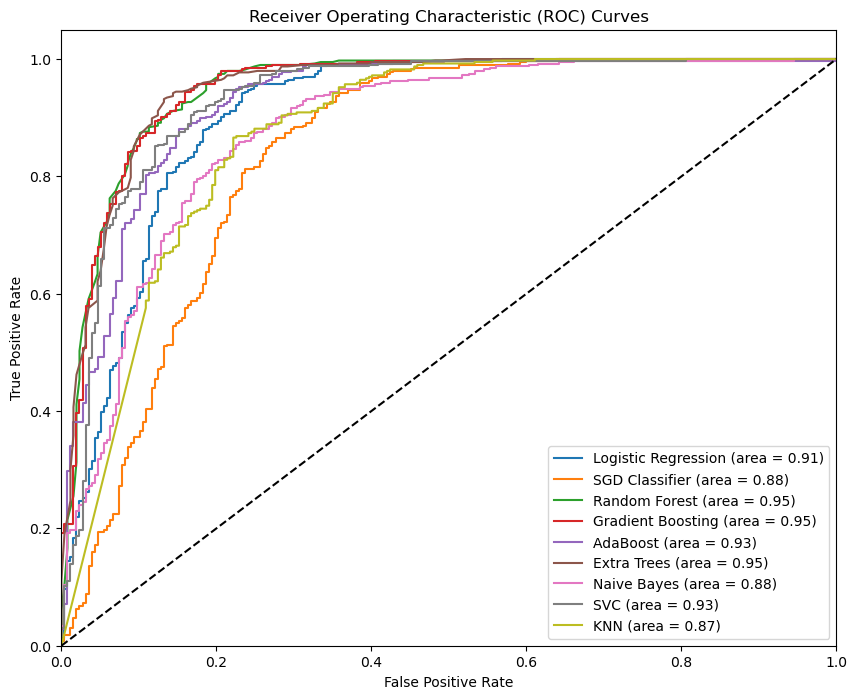

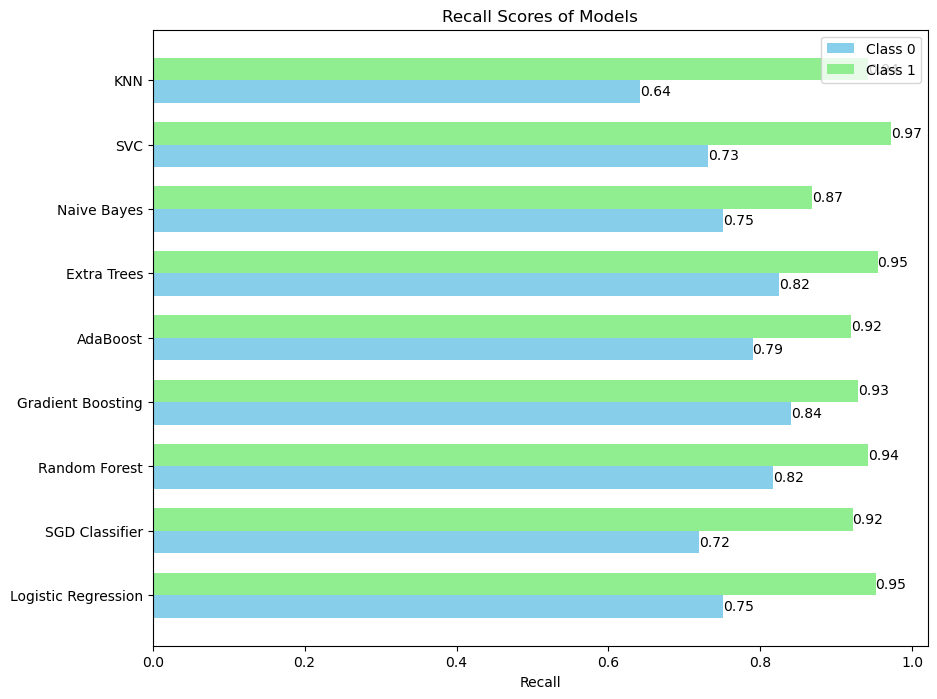

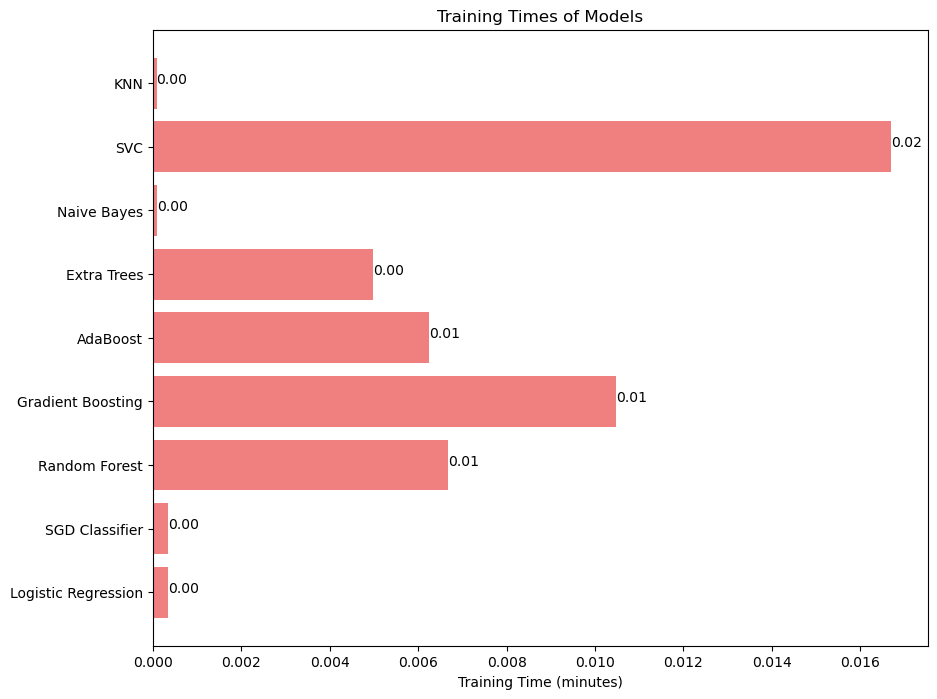

In [36]:
# Comportamento dos modelos.
modelos_binarios = ModelosBinarios()
modelos_binarios.evaluate_models(X_train, y_train, X_test, y_test)


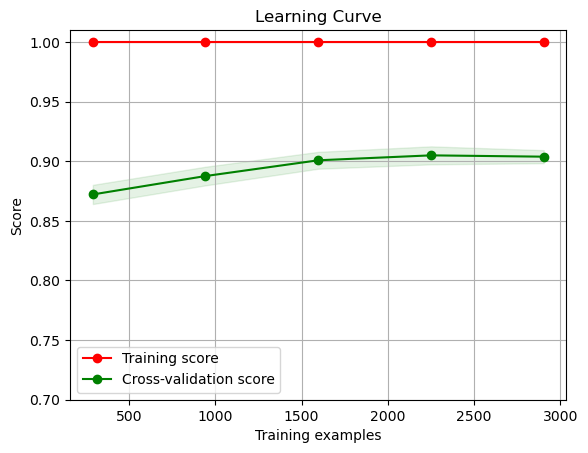

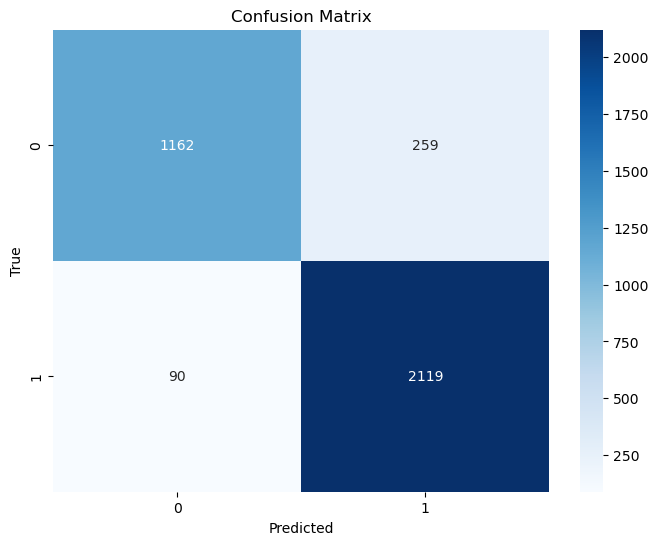

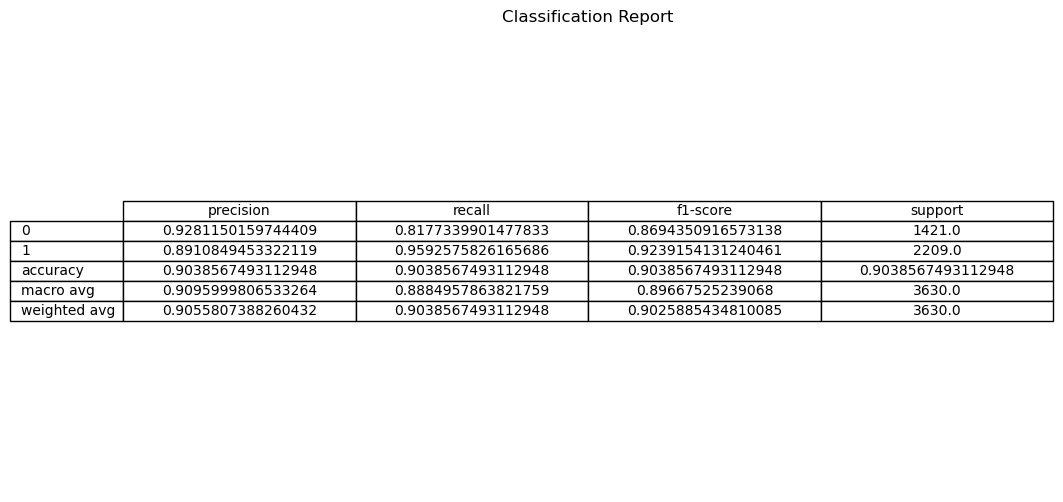

Recall: 0.89
Precision: 0.91
F1 Score: 0.90


In [37]:
# Instanciar a classe
cv_extra_trees = CrossValidationExtraTrees()

# Plotar a curva de aprendizado
cv_extra_trees.plot_learning_curve(X, y, cv=5)

# Avaliar o modelo
cv_extra_trees.evaluate_model(X, y, cv=5)

In [38]:
# Realizar a busca bayesiana para otimização de hiperparâmetros
best_params, best_score = cv_extra_trees.bayesian_search(X, y, cv=5, n_iter=50)

Melhores parâmetros: OrderedDict([('bootstrap', True), ('max_depth', 21), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 500)])
Melhor score: 0.9061


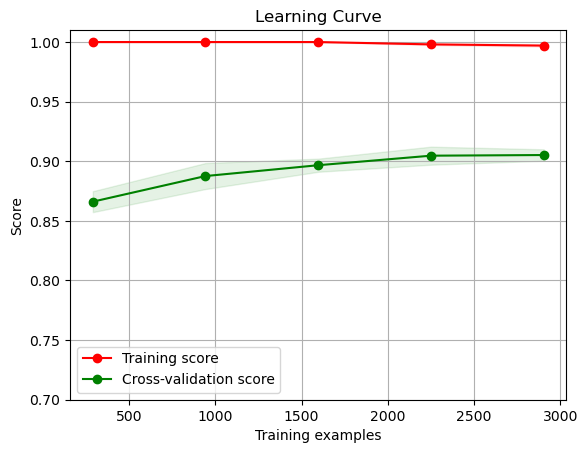

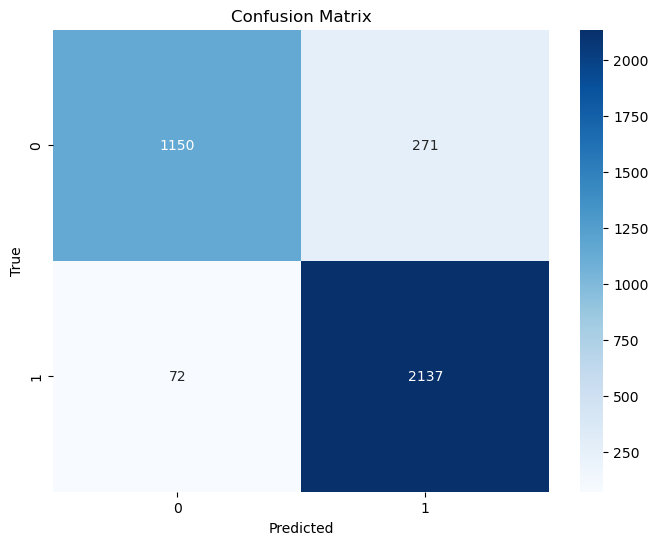

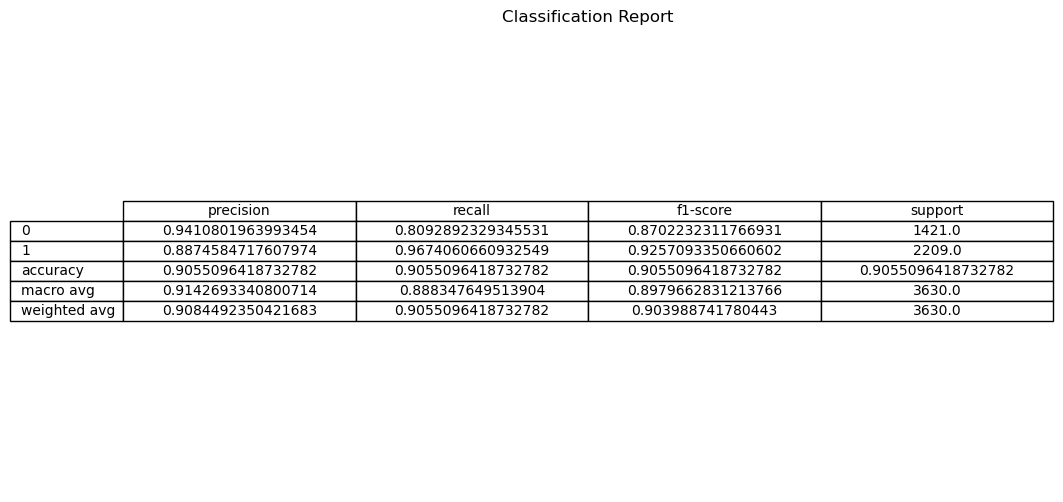

Recall: 0.89
Precision: 0.91
F1 Score: 0.90


In [39]:
# Criar uma instância da classe com os parâmetros fornecidos
custom_model = CustomExtraTrees(best_params)

# Plotar a curva de aprendizado
custom_model.plot_learning_curve(X, y, cv=5)

# Plotar a matriz de confusão e o relatório de classificação
custom_model.plot_confusion_matrix_and_report(X, y, cv=5)

## Conclusão
O melhor modelo, com base na análise das métricas de Recall, Especificidade e Roc_AUC, sendo as duas primeiras uma análise da classificação e o segundo uma ferramenta muito útil para comparação de comportamento de modelos de classificação binária, o modelo selecionado por ter o melhor comportamento em relação as técnicas testadas foi o ExtraTree. Com esse modelo selecionado fomos buscar os melhores parâmetros para ele, buscando aprofundar mais ainda sua capacidade de captar informações dos dados para nos entregar as melhores respostas e foi isso que aconteceu, de forme bem sutil, o modelo entregou uma leve melhora nos Falsos negativos, que é a métrica de relevância para nós. Abaixo agora será classificado os alunos que ainda estão cursando a universidade e vamos averiguar quais deles podem tracar o curso.